In [1]:
from fastai.collab import *
from fastai.tabular.all import *
from fastai.vision.widgets import *

# Similar Books

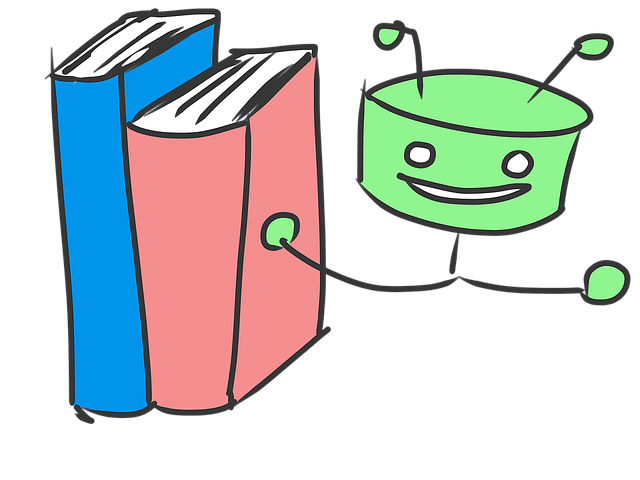

Welcome to Similar Books! Have you recently read a book that was a real page turner and you couldn't put it down, and now you are finished with it and you are wondering which next book you should read? Worry no more. You have come to the right place.

Similar Books will suggest to you a similar book to the one you have just read and even give you a link of the book's page in Amazon's GoodReads where you can review the book more and decide if you want to read it.

All you have to do is input the name of the book you want similar suggestions and how many books you want suggested and Similar Books will handle the rest! 

We currently have 10,000 books in our system! If you liked Similar Books, share it with a friend too so they can also enjoy.

### Developer Details

My name is Jimmie Munyi. You can connect with me on [Twitter](https://twitter.com/jimmie_munyi). You can check out other projects I have done from [My GitHub](https://github.com/jimmiemunyi) and from [My Blog](https://jimmiemunyi.github.io/blog/).

If you wish to see how Similar Books was created, read this [blog post](https://jimmiemunyi.github.io/blog/tutorial/2021/02/15/Book-Recommendation-Model-Training.html).

**NOTE**: Currently you have to type the name of the book exactly as it is, without spelling mistakes. If you mistype the name, you will get some default recommendations that will not be that helpful. We are currently implementing a search functionality to mitigate this problem. Thank you for understanding.

In [16]:
path = Path()
learn_inf = load_learner(path/'final_model.pkl', cpu=True)

book_factors = learn_inf.model.i_weight.weight

books = pd.read_csv('data/books.csv')

title_widget = widgets.Text(
    value='',
    placeholder='Enter Title Here',
    description='Title of Book:',
    disabled=False
)

number_widget = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Number of Books:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

out_pl = widgets.Output()
lbl_pred = widgets.Label()

def get_similar_books(title, number):
    idx = learn_inf.dls.classes['original_title'].o2i[title]
    distances = nn.CosineSimilarity(dim=1)(book_factors, book_factors[idx][None])
    idx = distances.argsort(descending=True)[1:number+1]
    similar = [learn_inf.dls.classes['original_title'][i] for i in idx]
    ids = [int(books.loc[books['original_title']==str(i)]['goodreads_book_id'].values[0]) for i in similar]
    urls = [f'https://www.goodreads.com/book/show/{id}' for id in ids]
    return similar, urls

In [9]:
def on_data_change(change):
    lbl_pred.value = ''
    title = title_widget.value
    number = number_widget.value
    similar, urls = get_similar_books(title, number)
    output = {}
    for book, url in zip(similar, urls):
        output[book] = url
#     out_pl.clear_output()
#     with out_pl: display(img.to_thumb(128,128))
    lbl_pred.value = output

In [17]:
display(VBox([title_widget, number_widget]))

In [14]:
title = 'Hour Game'
number = 10
similar, urls = get_similar_books(title, number)
for book, url in zip(similar, urls):
    print(f'[Book]: {book} {url}')

[Book]: Simple Genius https://www.goodreads.com/book/show/93947
[Book]: Split Second https://www.goodreads.com/book/show/204276
[Book]: First Family https://www.goodreads.com/book/show/5509321
[Book]: The Target https://www.goodreads.com/book/show/18353714
[Book]: True Blue https://www.goodreads.com/book/show/6528034
[Book]: Saving Faith https://www.goodreads.com/book/show/15157
[Book]: The Collectors https://www.goodreads.com/book/show/15154
[Book]: The Whole Truth https://www.goodreads.com/book/show/2260637
[Book]: The Camel Club https://www.goodreads.com/book/show/15158
[Book]: The Simple Truth https://www.goodreads.com/book/show/830791
